In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math 
from sklearn.neighbors import DistanceMetric
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_distances
from sklearn.model_selection import train_test_split




scaler = MinMaxScaler(feature_range = (0, 10))

# calculate the euclidean distance between two different movies in terms of 
# attributes other than IMDb scores
def E_dist(c1, c2, data):
  dist = DistanceMetric.get_metric('euclidean')
  arr = data[[c1,c2],1:6]
  res = dist.pairwise(arr)
  e_dist = res[0,1]
  return e_dist

# calculate the difference in IMDb scores between two movies
def I_dist(c1, c2, data):
  
  i_dist = abs(data[c1,6] - data[c2,6])
  return i_dist 





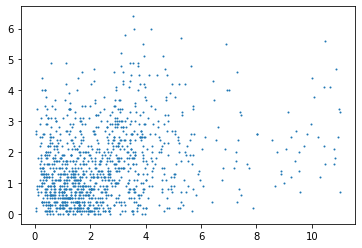

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


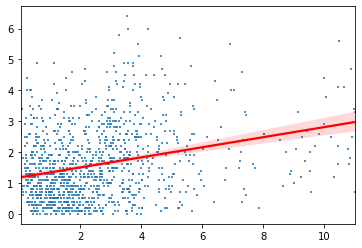

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt


if __name__ == "__main__":
  
  data = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_data/Data/movie_metadata_truncated.csv').values 

  #print(data[:10])

  #scale all the attributes (other than the IMDb scores) from 1 t0 10


  data[:,[1,2,3,4,5]] = scaler.fit_transform(data[:,[1,2,3,4,5]])
  
  

  #print(data[:,[1,2]])



  #e = E_dist(1,2,data)
  #i = I_dist(1,2,data)
  
  #print(e)

  #print(i)


  #dist = DistanceMetric.get_metric('euclidean')
  #arr = [[2, -1], [-2, 2]]
  #result = dist.pairwise(arr)
  #print(result)

  training_data, testing_data = train_test_split(data, test_size=0.01, random_state=39)
  
  size = testing_data.shape[0]
  
  fin_res = [] 
  x = []
  y = []
  for i in range(size):
    for j in range(i+1, size):
      e_d = E_dist(i,j,testing_data)
      i_d = I_dist(i,j,testing_data)
      fin_res.append([testing_data[i,0], testing_data[j,0], e_d, i_d])
      x.append(e_d)
      y.append(i_d)

  df = pd.DataFrame(fin_res)
  df.to_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_data/Data/output_data3.csv')
  
  plt.plot(x, y, 'o', ms = 1)
  plt.show()
  sns.regplot(x, y, marker="+",scatter_kws={'s':2}, line_kws={"color": "red"})